<a href="https://colab.research.google.com/github/AlineLataro/Desafio_AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apresentação do projeto de análise exploratória**


Este projeto de análise de dados foi desenvolvido como parte de um **desafio de formação Data Science da Alura** onde, iremos ajudar o Senhor João a decidir qual das suas quatro lojas (Loja 1, Loja 2, Loja 3 e Loja 4) ele deve vender.

Para isso, analisei os dados de vendas usando Python e a biblioteca pandas. Também usei o matplotlib para criar gráficos e comparações entre as lojas, deixando a análise mais visual e fácil de entender.

**Foram considerados os seguintes indicadores:**

```
Faturamento total por loja

Categorias de produtos mais e menos vendidos

Média das avaliações dos clientes

Produtos mais e menos vendidos

Frete médio por loja

```

Com base nas análises realizadas e nos gráficos gerados, a seguir apresento o desenvolvimento da análise e a recomendação final.

### Importação dos dados



In [214]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


O faturamento foi o primeiro indicador analisado:

Com base na análise do faturamento das quatro lojas, foi possível identificar que a Loja 1 teve o maior faturamento no período analisado, enquanto a Loja 4 apresentou o menor faturamento.

In [220]:
lojas = [loja, loja2, loja3, loja4]

for i, l in enumerate(lojas, start=1):
    faturamento = sum(l.Preço)
    print(f'Faturamento da loja{i}: R$ {faturamento:,.2f}')



Faturamento da loja1: R$ 1,534,509.12
Faturamento da loja2: R$ 1,488,459.06
Faturamento da loja3: R$ 1,464,025.03
Faturamento da loja4: R$ 1,384,497.58


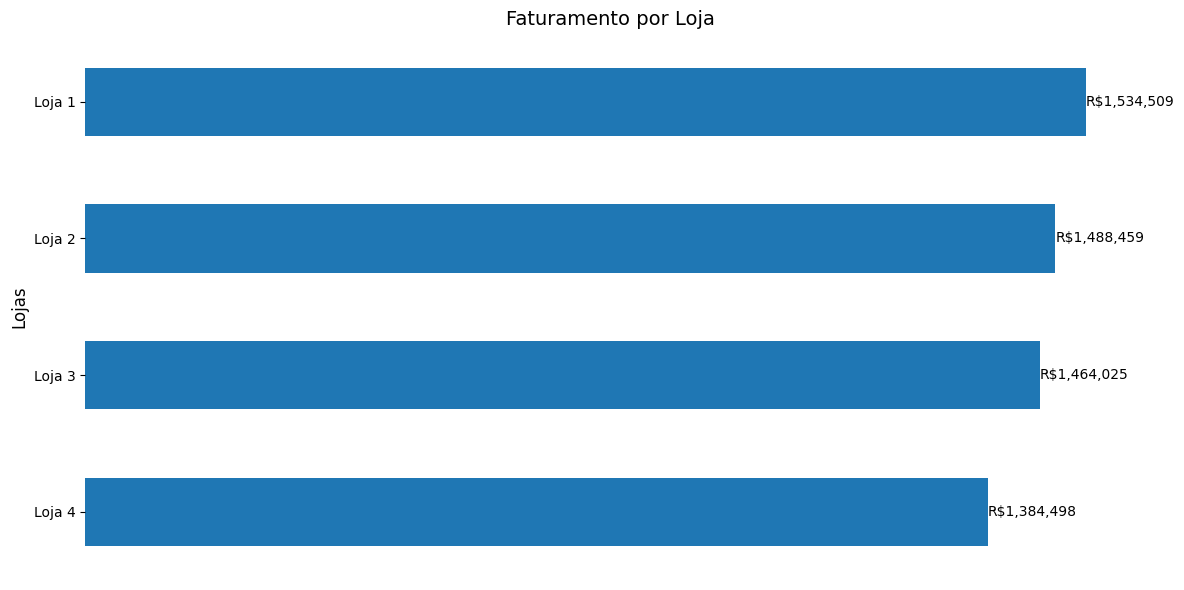

In [224]:
import matplotlib.pyplot as plt
import pandas as pd

lojas_nomes = ['Loja 4', 'Loja 3', 'Loja 2', 'Loja 1']
faturamentos = [faturamento_loja4, faturamento_loja3, faturamento_loja2, faturamento_loja]

df_faturamento = pd.DataFrame({'Loja': lojas_nomes, 'Faturamento': faturamentos})

df_plot = df_faturamento.set_index('Loja')

ax = df_plot.plot(kind='barh', figsize=(12, 6), legend=False)

for i, valor in enumerate(df_faturamento['Faturamento']):
    ax.text(valor, i, f'R${valor:,.0f}', va='center')

ax.set_title('Faturamento por Loja', fontsize=14)
ax.set_ylabel('Lojas', fontsize=12)

ax.xaxis.set_visible(False)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Com base na análise de performance de cada categoria em cada loja observa-se que:

A **Loja 1** se destaca principalmente na venda de móveis, eletrônicos e eletrodomésticos, com um desempenho geral bem consistente. Em compensação, apresentou algumas fraquezas nas categorias de livros e utilidades domésticas.

A **Loja 2** teve bom desempenho nas vendas de livros e instrumentos musicais, mostrando um perfil equilibrado e talvez com foco maior em produtos culturais.

A **Loja 3** foi a que mais se destacou nas categorias de móveis e eletrônicos, com um perfil voltado para produtos de maior valor agregado.

Já a **Loja 4** teve o menor desempenho em várias categorias, mas se destacou nas vendas de brinquedos e utilidades domésticas, indicando que pode estar atendendo um público mais voltado para o lar e para crianças.

In [69]:
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

vendas_por_categoria = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)]


vendas_por_categoria = pd.concat(vendas_por_categoria, axis=1)
vendas_por_categoria.columns = nomes


print(vendas_por_categoria)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


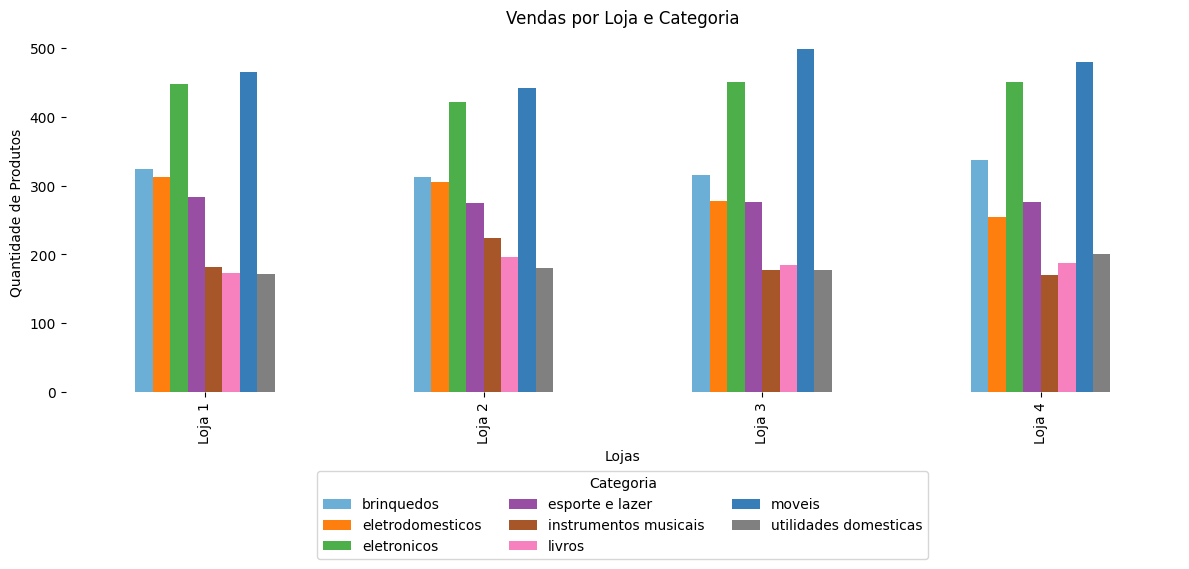

In [225]:
tabela_plot = vendas_por_categoria.T

cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3', '#a65628', '#f781bf', '#377eb8', '#808080']

tabela_plot.plot(kind='bar', figsize=(12, 6), color=cores[:tabela_plot.shape[1]])


plt.title('Vendas por Loja e Categoria')
plt.ylabel('Quantidade de Produtos')
plt.xlabel('Lojas')

plt.legend(title='Categoria', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Com base na análise das médias das notas de avaliação de cada loja, observa-se que:

A **Loja 1** apresentou a **menor média de avaliação (3,98)**, ainda dentro de um patamar satisfatório. Esse resultado pode estar relacionado a uma logística menos eficiente — como sugerido pelo frete médio mais alto — ou a falhas pontuais no pós-venda.

A **Loja 4** vem logo em seguida, com uma **média de 4,00**. Mesmo com um desempenho geral de vendas mais baixo, conseguiu manter um bom nível de satisfação, o que pode indicar um atendimento mais direcionado e personalizado.

A **Loja 2** teve uma **média de 4,04**, reforçando seu perfil equilibrado e mostrando bom posicionamento em categorias com maior valorização cultural.

A **Loja 3** obteve a melhor **média de avaliação (4,05)**, o que pode indicar uma maior satisfação dos clientes, refletindo uma boa experiência de compra, qualidade dos produtos e eficiência no atendimento e na entrega.

In [218]:
lojas = [loja, loja2, loja3, loja4]

for i, l in enumerate(lojas, start=1):
    avaliacao = round(sum(l["Avaliação da compra"]) / len(l["Avaliação da compra"]), 2)
    print(f'Avaliação da loja{i}:', avaliacao)



Avaliação da loja1: 3.98
Avaliação da loja2: 4.04
Avaliação da loja3: 4.05
Avaliação da loja4: 4.0


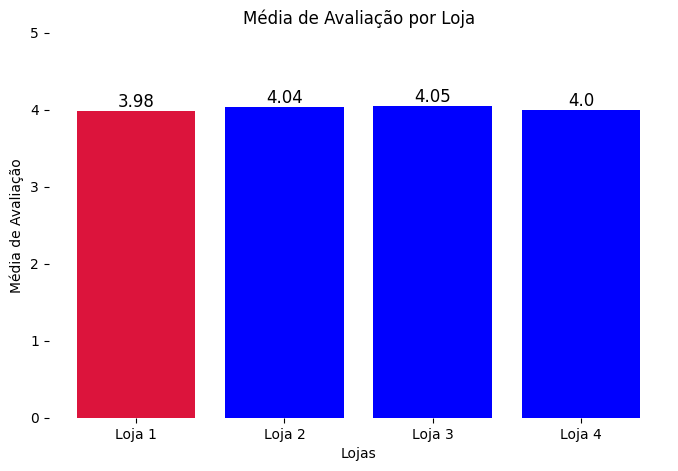

In [219]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.0]

pior_media = min(medias)
cores = ['#0000FF' if media != pior_media else '#DC143C' for media in medias]

plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color=cores)

plt.title('Média de Avaliação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)

for i, media in enumerate(medias):
    plt.text(i, media, f'{media}', ha='center', va='bottom', fontsize=12)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


# 4. Produtos Mais e Menos Vendidos

Com base na análise das médias das notas de avaliação de cada loja, observa-se que:

**Loja 1**

Entre os produtos mais vendidos estão a secadora de roupas (214 unidades), a TV LED UHD 4K (196 unidades) e a cômoda (188 unidades). Já entre os menos vendidos estão o dinossauro rex (94 unidades), a mochila (90 unidades) e o celular ABXY (78 unidades).


**Loja 2**

Os destaques de venda foram o livro Iniciando em Programação (223 unidades), o celular Plus X42 (195 unidades) e o violão (183 unidades). Os produtos com menor saída foram a bicicleta (98 unidades), o jogo de copos (98 unidades) e a mesa de jantar (89 unidades).


**Loja 3**

Os itens mais vendidos foram a bicicleta (191 unidades), o fogão (182 unidades) e o jogo de tabuleiro (181 unidades). Já entre os menos vendidos estão a guitarra (100 unidades), o smartwatch (100 unidades) e a TV LED UHD 4K (94 unidades).


**Loja 4**

Entre os produtos mais vendidos estão o curso Dashboard Power BI (196 unidades), a cama box (195 unidades) e o faqueiro (183 unidades). Os produtos de menor saída foram a guitarra (97 unidades), o smartwatch (93 unidades) e o guarda-roupas (88 unidades).

In [223]:
produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

print("Loja 1 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja1.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja1.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 2 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja2.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja2.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 3 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja3.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja3.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 4 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja4.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja4.tail(3).to_string(justify='left', index=False), "\n\n\n")

Loja 1 - Produtos mais e menos vendidos:

Mais vendidos:

Produto             Quantidade Vendida
Secadora de roupas 214                
     TV Led UHD 4K 196                
            Cômoda 188                
Menos vendidos:

Produto         Quantidade Vendida
Dinossauro Rex 94                 
       Mochila 90                 
  Celular ABXY 78                  



Loja 2 - Produtos mais e menos vendidos:

Mais vendidos:

Produto                   Quantidade Vendida
Iniciando em programação 223                
        Celular Plus X42 195                
                  Violão 183                
Menos vendidos:

Produto         Quantidade Vendida
     Bicicleta 98                 
 Jogo de copos 98                 
Mesa de jantar 89                  



Loja 3 - Produtos mais e menos vendidos:

Mais vendidos:

Produto            Quantidade Vendida
        Bicicleta 191                
            Fogão 182                
Jogo de tabuleiro 181                
Menos vendidos:


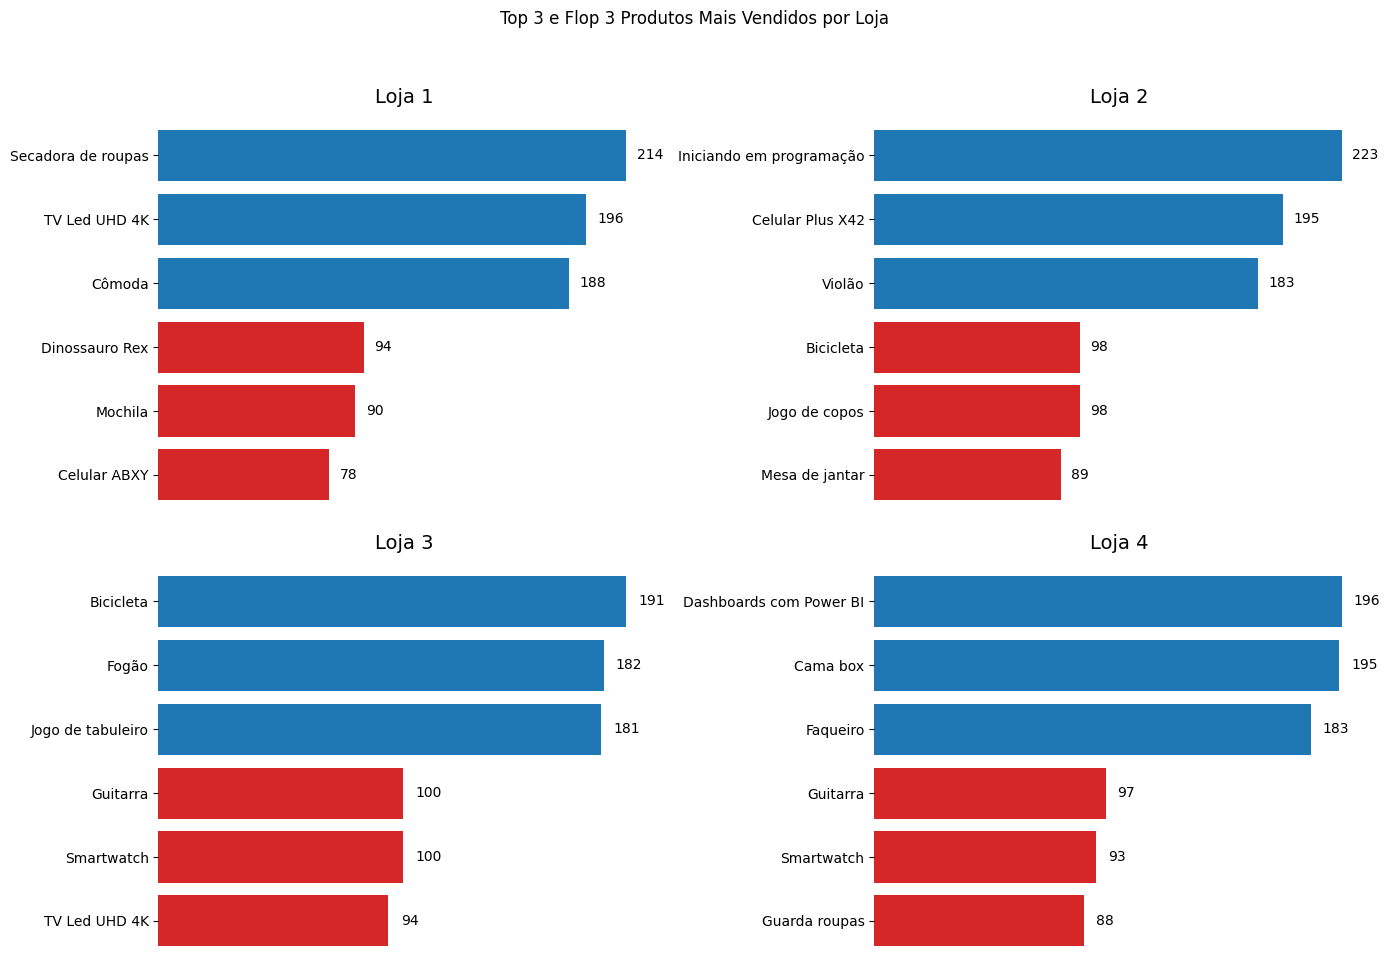

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

produtos_por_loja = {
    'Loja 1': (produtos_loja1.head(3), produtos_loja1.tail(3)),
    'Loja 2': (produtos_loja2.head(3), produtos_loja2.tail(3)),
    'Loja 3': (produtos_loja3.head(3), produtos_loja3.tail(3)),
    'Loja 4': (produtos_loja4.head(3), produtos_loja4.tail(3))
}

cores_top = '#1f77b4'
cores_flop = '#d62728'

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, loja in enumerate(lojas):
    top3, flop3 = produtos_por_loja[loja]

    dados = pd.concat([top3, flop3])

    cores = [cores_top] * len(top3) + [cores_flop] * len(flop3)

    axs[i].barh(dados["Produto"], dados["Quantidade Vendida"], color=cores)
    axs[i].set_title(loja, fontsize=14)
    axs[i].invert_yaxis()
    axs[i].xaxis.set_visible(False)
    axs[i].grid(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

    for j, v in enumerate(dados["Quantidade Vendida"]):
        axs[i].text(v + 5, j, str(v), va='center', fontsize=10)



fig.suptitle('Top 3 e Flop 3 Produtos Mais Vendidos por Loja')
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()





# 5. Frete Médio por Loja


Com base na análise dos valores médios de frete de cada loja, observa-se que:

**Loja 1:**

Evidencia o maior custo total de frete e o maior frete médio em comparação com as demais lojas. Tal cenário pode ser reflexo de um elevado volume de pedidos. Contudo, é importante considerar a possibilidade de ineficiências nos processos logísticos ou um ticket médio de vendas inferior, o que poderia elevar a representatividade proporcional do custo de frete.

**Loja 2:**

Demonstra custos totais e médios de frete ligeiramente inferiores aos da Loja 1. Essa observação sugere um volume de vendas similar, acompanhado de uma operação logística potencialmente mais otimizada.

**Loja 3:**

Exibe o menor custo total de frete e o menor frete médio dentre as três primeiras lojas analisadas, indicando uma maior eficiência logística. Este resultado pode ser atribuído a fatores como um planejamento de rotas aprimorado, um maior volume de itens por pedido ou uma localização geográfica dos clientes mais favorável.

**Loja 4:**

Apresenta o menor custo total de frete e o menor frete médio, concomitantemente com o menor volume de vendas. Essa correlação sugere que os custos de frete reduzidos estão mais associados ao baixo volume de transações comerciais da loja do que a melhorias significativas na eficiência da sua logística.

In [217]:
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

for nome, dados in lojas.items():
    frete_medio = round(dados['Frete'].sum() / len(dados['Frete']), 2)

    print(f'A média de frete da {nome} é: R$ {frete_medio}')

A média de frete da Loja 1 é: R$ 34.69
A média de frete da Loja 2 é: R$ 33.62
A média de frete da Loja 3 é: R$ 33.07
A média de frete da Loja 4 é: R$ 31.28
